# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Reading in the data
df = pd.read_csv('../data/genre_clean.csv')

In [3]:
# Taking a look at the data
df.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels,y
0,reggae.00080.wav,0.094298,2539.121009,5260.771360,-103.136673,67.205032,2.212647,28.504496,4.172197,11.874951,14.244764,14.292829,3.261752,15.854269,8.042967,4.469097,8.679431,reggae,9
1,jazz.00016.wav,0.069845,1465.857446,2822.406728,-259.876740,123.187164,-6.390842,37.570335,-2.977656,13.057896,-14.083035,5.310007,-11.961549,3.524627,-9.633516,5.333287,-7.843499,jazz,6
2,disco.00052.wav,0.169775,2590.650686,5060.527559,-70.502701,90.517845,-48.066078,36.687813,-17.691069,21.595446,-30.198866,24.046898,-20.459778,14.487847,-18.499725,9.128921,-12.056172,disco,4
3,jazz.00002.wav,0.057857,1064.668667,1895.729578,-256.959015,175.358765,-44.822285,25.650620,-4.255735,-0.222764,-11.312749,-9.189112,-4.095360,-8.308260,-22.548216,-7.608586,-7.651291,jazz,6
4,disco.00046.wav,0.114198,2259.565542,4889.552594,-125.681534,101.784462,-17.478100,33.672756,-15.236323,23.703140,-8.659072,18.544029,-14.054308,19.970242,-15.139117,12.969249,-14.306309,disco,4


In [4]:
# Looking at some descriptive statistics
df.describe()

,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.103612,2201.780898,4571.549304,-144.472987,99.554278,-8.920291,36.292449,-1.144840,14.633491,-5.129038,10.119172,-6.994062,7.729784,-6.021069,4.471693,-4.795884,5.500000
std,0.041821,715.960600,1574.791602,100.229406,31.330873,21.690677,16.664666,12.221340,11.839591,9.940460,10.463270,8.283921,7.937309,6.817013,6.715787,6.170181,2.873719
min,0.021697,570.040355,749.140636,-552.120056,-1.461542,-89.870193,-18.727547,-38.890350,-28.415911,-32.930431,-24.915823,-31.640574,-12.050179,-28.057501,-15.796446,-27.523129,1.000000
25%,0.070244,1627.697311,3380.069642,-200.763893,76.779915,-24.219811,24.108214,-9.979157,5.098573,-12.870810,1.609182,-13.246939,1.620753,-10.964135,-0.547370,-9.357906,3.000000
50%,0.099503,2209.263090,4658.524473,-120.286385,98.458744,-10.707894,36.960085,-0.022276,15.006958,-5.714962,9.668147,-7.517392,7.127483,-5.924517,3.875856,-4.198379,5.500000
75%,0.131944,2691.294667,5533.810460,-73.913042,119.954811,5.505812,48.216259,7.928092,23.851868,2.975042,18.710624,-0.380487,14.383610,-1.029847,9.706858,-0.159545,8.000000
max,0.274631,4435.243901,8677.672688,42.039433,193.097397,56.682800,80.702301,31.440582,45.173176,21.827339,49.011353,19.133009,27.212437,17.421560,23.034859,13.051313,10.000000


## Plotting Mel Spectrograms

In [5]:
def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'../data/wavfiles/{genre}.00000.wav')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

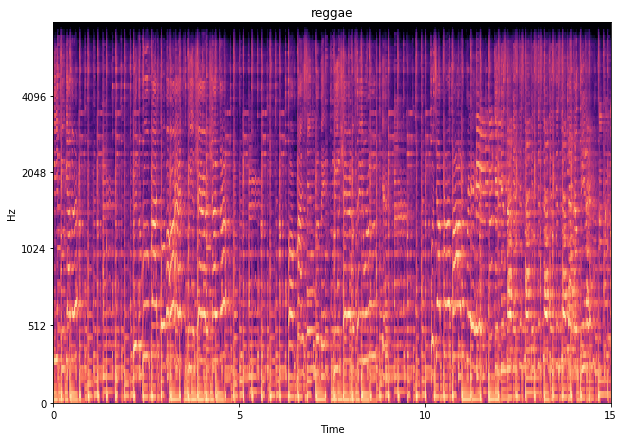

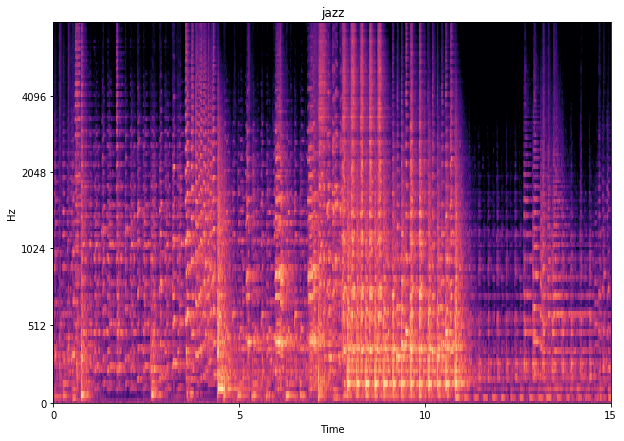

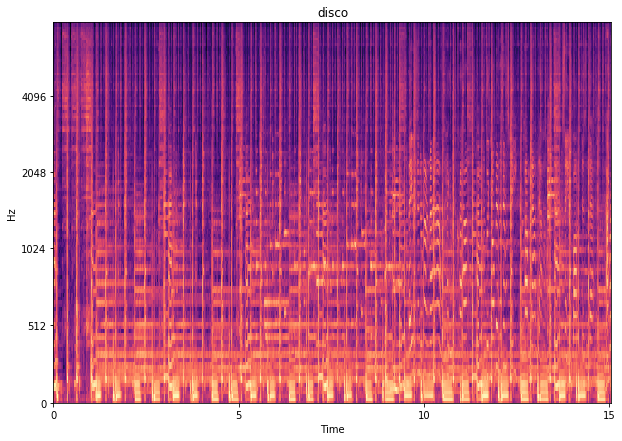

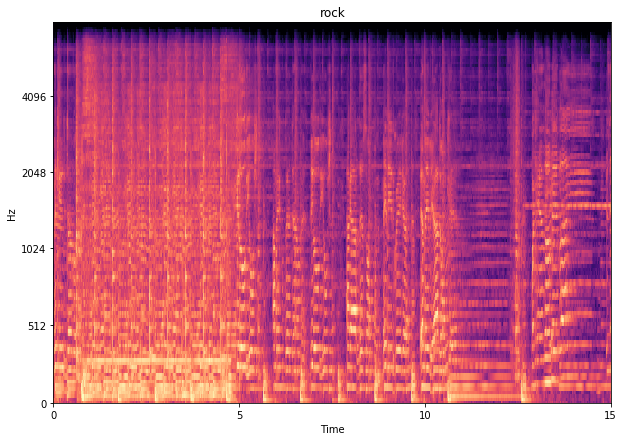

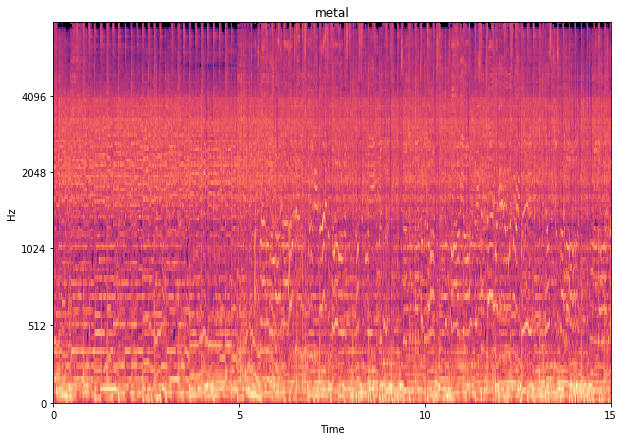

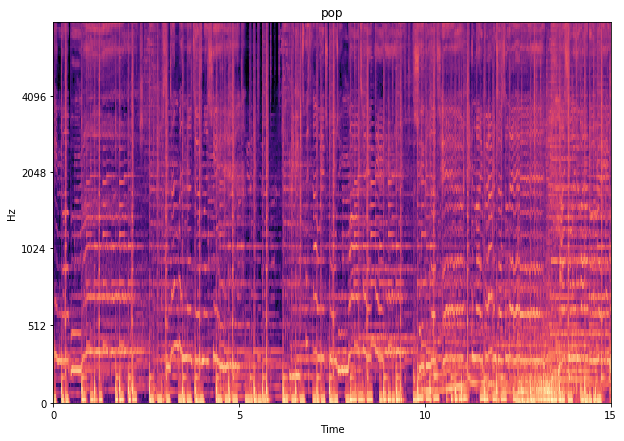

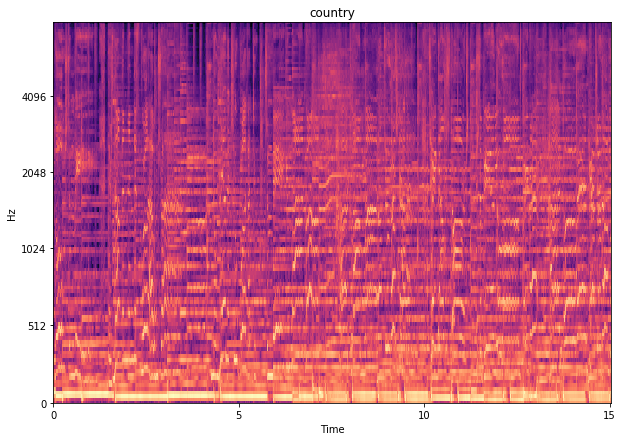

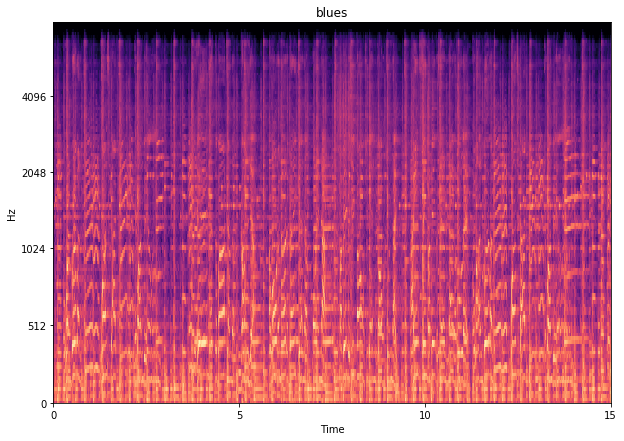

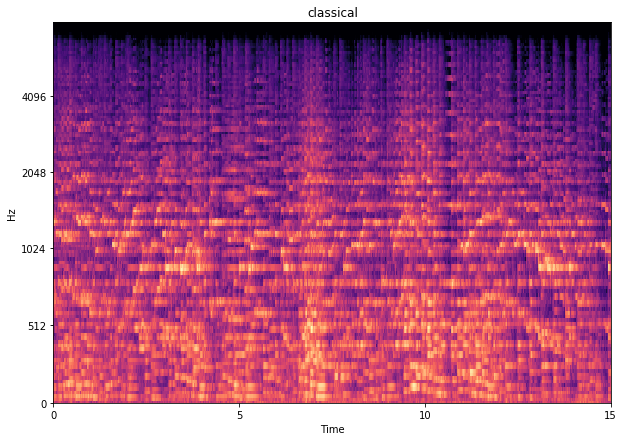

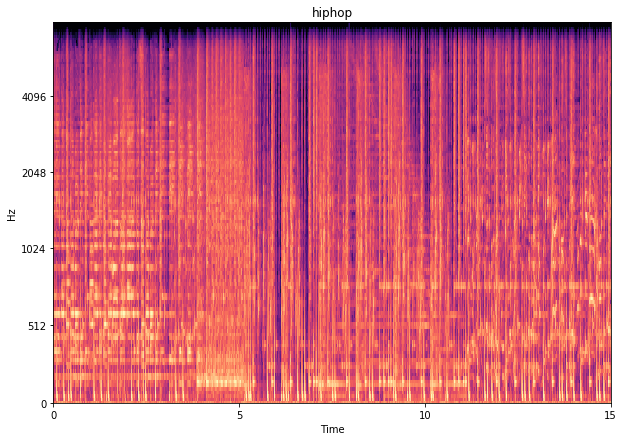

In [6]:
# Creating a list of all the genres
genres = list(df['labels'].unique())

# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)

In [7]:
def spectrogram_subplots(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(genre):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'../data/wavfiles/{kind}.00000.wav')
        
        # Computing the mel spectrogram
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time', ax = ax[i])
        ax[i].set_title(str(kind))

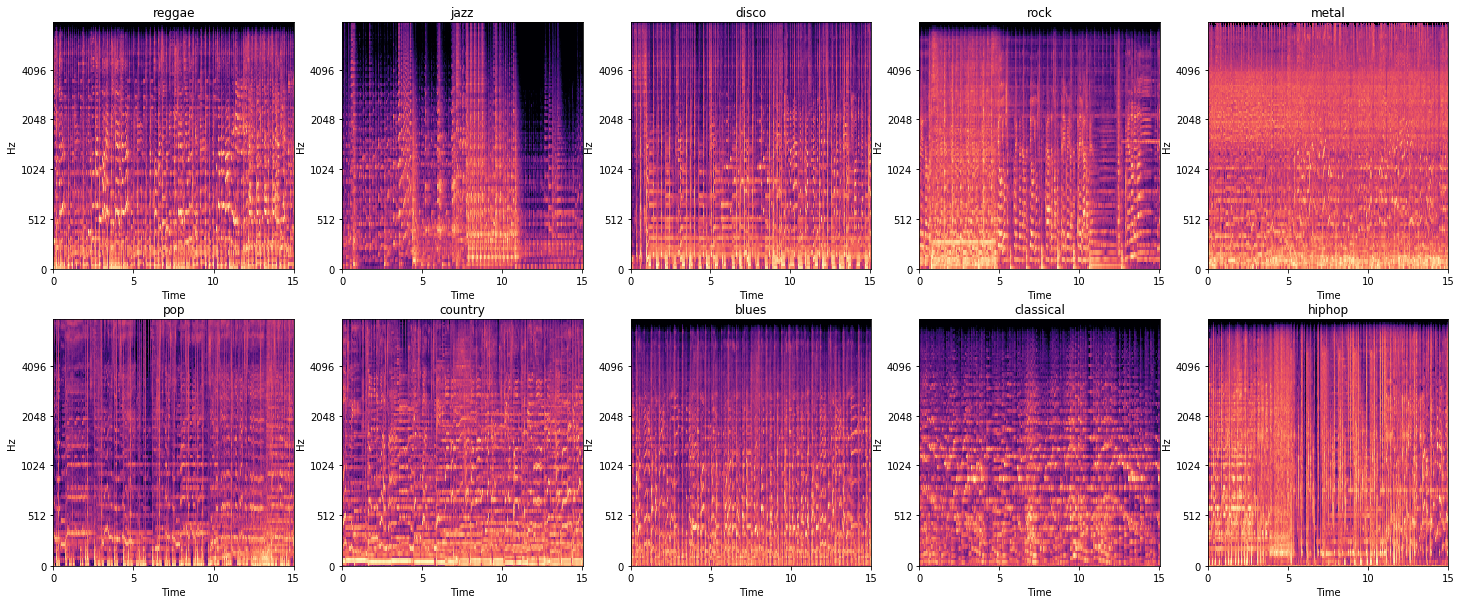

In [8]:
spectrogram_subplots(genres)

## Correlations

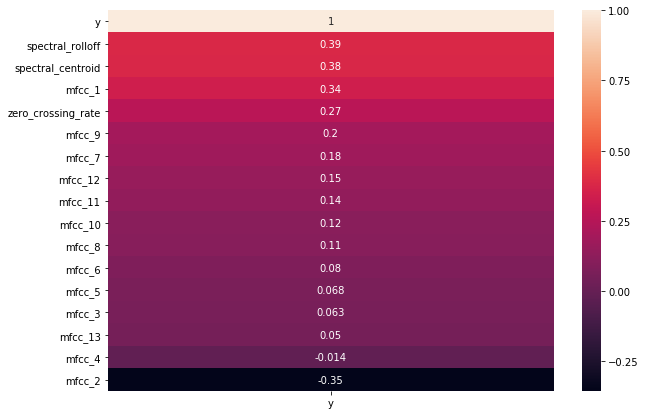

In [9]:
# Checking correlations
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[['y']].sort_values('y', ascending=False), annot=True);